Aim:
Clean survey dataset
- unify commata to decimals
- clean columns from typos
- define correct datatype to the columns
- select cols wich could be later needed for model development
. combine targets based on compared predictators

In [131]:
import sys, os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio

import re
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')

<Figure size 2000x1000 with 0 Axes>

In [132]:
# load raw survey data

raw_data = pd.read_excel("../input_survey_data/all-attributes_shophouses.xlsx")#, thousands=',')
raw_data.tail(3)

,Q0.1,Q0.2.Ward,Q0.2.District,Q0.3,Q0.4,Q0.5,Q0.6,Q0.7,Pre.Q1,Pre.Q2,P1Q1,P1Q1.specify,P1Q2.1.1,P1Q2.2.1,P1Q2.3.1,P1Q2.4.1,P1Q2.5.1.0,P1Q2.5.1.1,P1Q2.5.1.2,P1Q2.5.1.3,P1Q2.5.1.4,P1Q2.5.1.88,P1Q2.5.1.99,P1Q2.5.1.specify,P1Q2.6.1,P1Q2.7.1.1,P1Q2.7.1.2,P1Q2.7.1.3,P1Q2.7.1.88,P1Q2.7.1.99,P1Q2.7.1.specify,P1Q2.8.1.1,P1Q2.8.1.2,P1Q2.8.1.3,P1Q2.8.1.4,P1Q2.8.1.5,P1Q2.8.1.6,P1Q2.8.1.7,P1Q2.8.1.8,P1Q2.8.1.9,P1Q2.8.1.10,P1Q2.8.1.99,P1Q2.8.1.specify,P1Q2.9.1,P1Q2.10.1.1,P1Q2.10.1.2,P1Q2.10.1.3,P1Q2.10.1.4,P1Q2.10.1.5,P1Q2.10.1.6,P1Q2.10.1.7,P1Q2.10.1.8,P1Q2.10.1.9,P1Q2.10.1.88,P1Q2.10.1.99,P1Q2.10.1.specify,P1Q2.11.1.1,P1Q2.11.1.2,P1Q2.11.1.3,P1Q2.11.1.4,P1Q2.11.1.5,P1Q2.11.1.6,P1Q2.11.1.7,P1Q2.11.1.8,P1Q2.11.1.9,P1Q2.11.1.88,P1Q2.11.1.99,P1Q2.11.1.specify,P1Q3.2.1,P1Q3.3.1,P1Q3.4.1,P1Q3.5.1,P1Q3.6.1,P1Q3.7.1,P1Q3.88.1,P1Q3.88.1.specify,P1Q3.8.1,P1Q3.9.1.man,P1Q3.9.1.days,P1Q3.10.1.1,P1Q3.10.1.2,P1Q3.10.1.3,P1Q3.10.1.4,P1Q3.10.1.5,P1Q3.10.1.6,P1Q3.10.1.88,P1Q3.10.1.99,P1Q3.10.1.specify,P1Q3.11.1,P1Q4.2.1,P1Q4.3.1,P1Q4.4.1,P1Q4.5.1,P1Q4.88.1,P1Q4.88.1.specify,P1Q4.6.1,P1Q5.2.1,P1Q5.3.1,P1Q5.4.1,P1Q5.5.1,P1Q5.88.1,P1Q5.88.1.specify,P1Q5.6.1,P1Q5.7.1,P1Q5.8.1,P1Q5.9.1,P1Q6.2.1.1.relationship,P1Q6.2.1.1.specify,P1Q6.2.1.1.sex,P1Q6.2.1.1.Age,P1Q6.3.1.1.Rank1,P1Q6.3.1.1.Rank2,P1Q6.3.1.1.Rank3,P1Q6.3.1.1.Rank4,P1Q6.3.1.1.Rank5,P1Q6.3.1.1.Rank88,P1Q6.3.1.1.specify,P1Q6.4.1.1,P1Q6.2.1.2.relationship,P1Q6.2.1.2.specify,P1Q6.2.1.2.sex,P1Q6.2.1.2.Age,P1Q6.3.1.2.Rank1,P1Q6.3.1.2.Rank2,P1Q6.3.1.2.Rank3,P1Q6.3.1.2.Rank4,P1Q6.3.1.2.Rank5,P1Q6.3.1.2.Rank88,P1Q6.3.1.2.specify,P1Q6.4.1.2,P1Q6.2.1.3.relationship,P1Q6.2.1.3.specify,P1Q6.2.1.3.sex,P1Q6.2.1.3.Age,P1Q6.3.1.3.Rank1,P1Q6.3.1.3.Rank2,P1Q6.3.1.3.Rank3,P1Q6.3.1.3.Rank4,P1Q6.3.1.3.Rank5,P1Q6.3.1.3.Rank88,P1Q6.3.1.3.specify,P1Q6.4.1.3,P1Q7.2.1.1,P1Q7.2.1.2,P1Q7.2.1.3,P1Q7.2.1.4,P1Q7.2.1.5,P1Q7.2.1.88,P1Q7.2.1.98,P1Q7.2.1.99,P1Q7.2.1.specify,P1Q7.3.1.1,P1Q7.3.1.2,P1Q7.3.1.3,P1Q7.3.1.4,P1Q7.3.1.5,P1Q7.3.1.6,P1Q7.3.1.88,P1Q7.3.1.98,P1Q7.3.1.99,P1Q7.3.1.specify,P1Q2.1.2,P1Q2.2.2,P1Q2.3.2,P1Q2.4.2,P1Q2.5.2.0,P1Q2.5.2.1,P1Q2.5.2.2,P1Q2.5.2.3,P1Q2.5.2.4,P1Q2.5.2.88,P1Q2.5.2.99,P1Q2.5.2.specify,P1Q2.6.2,P1Q2.7.2.1,P1Q2.7.2.2,P1Q2.7.2.3,P1Q2.7.2.88,P1Q2.7.2.99,P1Q2.7.2.specify,P1Q2.8.2.1,P1Q2.8.2.2,P1Q2.8.2.3,P1Q2.8.2.4,P1Q2.8.2.5,P1Q2.8.2.6,P1Q2.8.2.7,P1Q2.8.2.8,P1Q2.8.2.9,P1Q2.8.2.10,P1Q2.8.2.99,P1Q2.8.2.specify,P1Q2.9.2,P1Q2.10.2.1,P1Q2.10.2.2,P1Q2.10.2.3,P1Q2.10.2.4,P1Q2.10.2.5,P1Q2.10.2.6,P1Q2.10.2.7,P1Q2.10.2.8,P1Q2.10.2.9,P1Q2.10.2.88,P1Q2.10.2.99,P1Q2.10.2.specify,P1Q2.11.2.1,P1Q2.11.2.2,P1Q2.11.2.3,P1Q2.11.2.4,P1Q2.11.2.5,P1Q2.11.2.6,P1Q2.11.2.7,P1Q2.11.2.8,P1Q2.11.2.9,P1Q2.11.2.88,P1Q2.11.2.99,P1Q2.11.2.specify,P1Q3.2.2,P1Q3.3.2,P1Q3.4.2,P1Q3.5.2,P1Q3.6.2,P1Q3.7.2,P1Q3.88.2,P1Q3.88.2.specify,P1Q3.8.2,P1Q3.9.2.man,P1Q3.9.2.days,P1Q3.10.2.1,P1Q3.10.2.2,P1Q3.10.2.3,P1Q3.10.2.4,P1Q3.10.2.5,P1Q3.10.2.6,P1Q3.10.2.88,P1Q3.10.2.99,P1Q3.10.2.specify,P1Q3.11.2,P1Q4.2.2,P1Q4.3.2,P1Q4.4.2,P1Q4.5.2,P1Q4.88.2,P1Q4.88.2.specify,P1Q4.6.2,P1Q5.2.2,P1Q5.3.2,P1Q5.4.2,P1Q5.5.2,P1Q5.88.2,P1Q5.88.2.specify,P1Q5.6.2,P1Q5.7.2,P1Q5.8.2,P1Q5.9.2,P1Q6.2.2.1.relationship,P1Q6.2.2.1.specify,P1Q6.2.2.1.sex,P1Q6.2.2.1.Age,P1Q6.3.2.1.Rank1,P1Q6.3.2.1.Rank2,P1Q6.3.2.1.Rank3,P1Q6.3.2.1.Rank4,P1Q6.3.2.1.Rank5,P1Q6.3.2.1.Rank88,P1Q6.3.2.1.specify,P1Q6.4.2.1,P1Q6.2.2.2.relationship,P1Q6.2.2.2.specify,P1Q6.2.2.2.sex,P1Q6.2.2.2.Age,P1Q6.3.2.2.Rank1,P1Q6.3.2.2.Rank2,P1Q6.3.2.2.Rank3,P1Q6.3.2.2.Rank4,P1Q6.3.2.2.Rank5,P1Q6.3.2.2.Rank88,P1Q6.3.2.2.specify,P1Q6.4.2.2,P1Q6.2.2.3.relationship,P1Q6.2.2.3.specify,P1Q6.2.2.3.sex,P1Q6.2.2.3.Age,P1Q6.3.2.3.Rank1,P1Q6.3.2.3.Rank2,P1Q6.3.2.3.Rank3,P1Q6.3.2.3.Rank4,P1Q6.3.2.3.Rank5,P1Q6.3.2.3.Rank88,P1Q6.3.2.3.specify,P1Q6.4.2.3,P1Q7.2.2.1,P1Q7.2.2.2,P1Q7.2.2.3,P1Q7.2.2.4,P1Q7.2.2.5,P1Q7.2.2.88,P1Q7.2.2.98,P1Q7.2.2.99,P1Q7.2.2.specify,P1Q7.3.2.1,P1Q7.3.2.2,P1Q7.3.2.3,P1Q7.3.2.4,P1Q7.3.2.5,P1Q7.3.2.6,P1Q7.3.2.88,P1Q7.3.2.98,P1Q7.3.2.99,P1Q7.3.2.specify,P2Q1.1.implement,P2Q1.1.spend,P2Q1.2.implement,P2Q1.2

#####################

In [133]:
# df_aa = df_a
# df_aa.shape

In [134]:
# for c in df_aa.columns:
#     #print(c, df_aa[c].isna().sum())
#    # df_candidates_X.astype(float)[c].fillna((df_candidates_X.astype(float)[c].mean()), inplace=True)
#     df_aa = df_aa.astype(float).fillna(df_aa.mean())
# df_aa.info()

In [135]:
# df_aa = df_aa.dropna(axis=1, how='all')
# print(df_aa.shape, df_aa.head(2))

# df_aa_X = df_aa[df_aa.columns.drop(list(df_aa.filter(regex='^Target')))]  # only explanatory vars

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(df_aa_X) # standarize the variables

# #df_candidates_X = np.nan_to_num(df_candidates_X)

In [136]:
# ## We will start by using only the first 2 leading principal components, and then explore 3 principal components and 4 principal components.
# pca = PCA(0.95)  # 95% of the variance should be explained
# PC = pca.fit_transform(X)
# principalDF = pd.DataFrame(data=PC)#, columns=['pc1','pc2', 'pc3'])
# df_pca = pd.concat([principalDF, df_aa[['Target_direct_s']]], axis = 1)
# df_pca.head()
# #X.columns.tolist()
# print(pca.n_components_)

# PC_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# components = df_aa_X.columns.tolist()  # use X before standarized

# loadingdf = pd.DataFrame(PC_loadings)#, columns=('PC1','PC2', 'PC3'))
# loadingdf["variable"] = components
# loadingdf


In [137]:
# transformed = pca.transform(X)
# transformed

#####################

#### Define targets, set geometry column
.. and move assumed important variable for indirect cost to beginning, maybe this variable could be a furhter target

In [138]:
df = raw_data

## _r = most recent flood , _s = most serious flood
df.insert(0, "Target_direct_r", df.pop("P1Q5.6.1"))  # target var for direct cost on content loss [VND]
df.insert(1, "Target_direct_s", df.pop("P1Q5.6.2"))

# explanatory var: monthly reduction of business [%] -> probl influences mainly economic damage costs
df.insert(2, "business_reduction_r", df.pop("P1Q5.9.1"))  
df.insert(3, "business_reduction_s", df.pop("P1Q5.9.2"))

## rename dates of flood events
df.rename(columns={"P1Q2.2.1": "flood_time_r", "P1Q2.2.2":"flood_time_s"}, inplace=True)



C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\1881046718.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, "Target_direct_r", df.pop("P1Q5.6.1"))  # target var for direct cost on content loss [VND]
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\1881046718.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(1, "Target_direct_s", df.pop("P1Q5.6.2"))
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\1881046718.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

## Data cleaning 

##### rename columns

In [139]:
## rename certain columns which could be needed as candidate predictors

col_names = {
                     'P1Q2.3.1':'inundation_duration_h_r',
                     'P1Q2.3.2':'inundation_duration_h_s',
                     'P1Q2.4.1':'water_depth_cm_r',
                     'P1Q2.4.2':'water_depth_cm_s',
                     'P1Q2.5.1':'contaminations_r',   # mulitple choice                  
                     'P1Q2.5.2':'contaminations_s',    # mulitple choice  
                     'P1Q2.6.1':'flowvelocity_r',
                     'P1Q2.6.2':'flowvelocity_s', 
                     'P1Q2.7.1':'main_causes_r',  # mulitple choice
                     'P1Q2.7.2':'main_causes_s',  # mulitple choice
                     'P1Q2.9.1':'warning_time_h_r',
                     'P1Q2.9.2':'warning_time_h_s',
                     'P1Q2.10.1':'emergency_measures_r', # mulitple choice
                     'P1Q2.10.2':'emergency_measures_s', # mulitple choice
                     'P1Q2.11.1':'overall_problem_house_r', # mulitple choice
                     'P1Q2.11.2':'overall_problem_house_s', # mulitple choice

                     'P1Q3.2.1':'damage_level_floor_r',
                     'P1Q3.2.2':'damage_level_floor_s',
                     'P1Q3.3.1':'damage_level_walls_r',
                     'P1Q3.3.2':'damage_level_walls_s',
                     'P1Q3.4.1':'damage_level_foundation_r',
                     'P1Q3.4.2':'damage_level_foundation_s',
                     'P1Q3.5.1':'damage_level_doors_r',
                     'P1Q3.5.2':'damage_level_doors_s',
                     'P1Q3.6.1':'damage_level_roof_r',
                     'P1Q3.6.2':'damage_level_roof_s',
                     'P1Q3.7.1':'damage_level_basement_r',
                     'P1Q3.7.2':'damage_level_basement_s',
                     'P1Q3.88.1':'damage_level_other_r',
                     'P1Q3.88.2':'damage_level_other_s',
                     'P1Q3.88.1.specify':'damage_level_specify_r',
                     'P1Q3.88.2.specify':'damage_level_specify_s',
                     'P1Q3.8.1':'repair_costs_building_VND_r',
                     'P1Q3.8.2':'repair_costs_building_VND_s',
                     'P1Q3.11.1':'repair_costs_building_complete_r',
                     'P1Q3.11.2':'repair_costs_building_complete_s',
                     'P1Q4.6.1':'repair_costs_residentail_contents_r',
                     'P1Q4.6.2':'repair_costs_residentail_contents_s',

                     'P1Q5.2.1':'shp_damage_level_furniture_r',
                     'P1Q5.3.1':'shp_damage_level_electronics_r',
                     'P1Q5.4.1':'shp_damage_level_equipment_r',
                     'P1Q5.5.1':'shp_damage_level_products_r',
                     'P1Q5.88.1':'shp_damage_level_others_r',
                     'P1Q5.2.2':'shp_damage_level_furniture_s',
                     'P1Q5.3.2':'shp_damage_level_electronics_s',
                     'P1Q5.4.2':'shp_damage_level_equipment_s',
                     'P1Q5.5.2':'shp_damage_level_products_s',
                     'P1Q5.88.2':'shp_damage_level_others_s',
                    # 'P1Q5.6.2':'shp_total_direct_loss_content',  ## TARGET 1 
                     'P1Q5.7.1':'shp_closed_d_r',
                     'P1Q5.7.2':'shp_closed_d_s',
                     'P1Q5.8.1':'shp_duration_back2normal_r',
                     'P1Q5.8.2':'shp_duration_back2normal_s',
                    # P1Q5.9.1 P1Q5.9.2 possile TARGETs, currently expl. var: business_reduction_.

                     'P2Q1.1.implement':'protect_valuables_impl',
                     'P2Q1.1.spend':'protect_valuables_spnd',
                     'P2Q1.2.implement':'water_barries_impl',
                     'P2Q1.2.spend':'water_barries_spnd',
                     'P2Q1.3.implement':'pumping_equipment_impl',
                     'P2Q1.3.spend':'pumping_equipment_spnd',
                     'P2Q1.4.implement':'elevation_building_impl',
                     'P2Q1.4.spend':'elevation_building_spnd',
                     'P2Q1.5.implement':'resistant_material_building_impl',
                     'P2Q1.5.spend':'resistant_material_building_spnd',
                     'P2Q1.6.implement':'electricity_higher_impl',
                     'P2Q1.6.spend':'electricity_higher_spnd',
                     'P2Q1.7.implement':'flood_protections_impl',
                     'P2Q1.7.spend':'flood_protections_spnd',
                     'P2Q2.1.1':'elevation_building_year',
                     'P2Q2.2':'elevation_building_height_cm',
                     'P2Q2.3':'elevation_building_elements',
                     'P2Q2.4':'elevation_building_material_costs',
                     'P2Q3.1.1':'insurance_building',
                     'P2Q3.2.1':'insurance_business',
                     
                     'P3Q1.1.1':'city_protection',
                     'P3Q1.2.1':'more_future_affected',
                     'P3Q1.3.1':'government_warnings',
                     'P3Q1.4.1':'government_careing',

                     'P4Q1.10':'household_income_aviable_monthly_mVND',
                     'P4Q1.1':'household_inhabitants_number',
                     'P4Q1.8':'household_education',
                     'P4Q1.10':'available_monthly_income_mVND',
                     'P4Q2.1':'building_movingin',
                     'P4Q2.2':'building_year', 
                     'P4Q2.3':'building_floorsize_sqm',
                     'P4Q3.1':'building_material_foundation', 
                     'P4Q3.2':'building_material_floor',
                     'P4Q3.3':'building_material_wall',
                     'P4Q3.4':'building_material_roof',
                     'P4Q3.5':'building_material_doors',
                     'P4Q3.6':'building_elevation_rel2surrounding_cat', 
                     'P4Q3.6.cm':'building_elevation_rel2surrounding_cm', 
                     'P4Q4.3.1':'building_renovation_elements_r',  # mulitple choice
                     'P4Q4.3.2':'building_renovation_elements_s',  # multiple choice
                     'P4Q4.4.1':'building_renovation_reasons_r',  # multiple choice
                     'P4Q4.4.2':'building_renovation_reasons_s',  # multiple choice
                     'P4Q4.5.1':'building_renovation_cost_mVND_r', 
                     'P4Q4.5.2':'building_renovation_cost_mVND_s',  

                     'P5Q1.10':'shp_benefits_last5years',
                     'P5Q1.11':'shp_risk_behaviour',
                     'P5Q1.12':'shp_monetary_resources_prenvention',
                     'P5Q1.1':'shp_position',
                     'P5Q1.2':'shp_established',
                     'P5Q1.3':'shp_sector', 
                     'P5Q1.4':'shp_employees',
                     'P5Q1.5':'shp_avgmonthly_sale_mVND',
                     'P5Q1.6.1':'shp_finance_investments',
                     'P5Q1.7':'shp_capital_mVND',
                     'P5Q1.9':'shp_suppliers_location',
}
# P1Q7.1.1 and .2 = from whom recieved help


for k, v in col_names.items():
    df.rename(columns ={ i: i.replace(k, v) for i in  df.columns }, inplace=True )


In [140]:
df.filter(regex="shp_sector")#.unique()
#raw_data.filter(regex="P4Q3.3").head(12)#astype("Int64").sort_values("P4Q3.2.Rank3")
#raw_data["P4Q3.2.Rank5"].unique()
#df["shp_risk_behaviour"]#.unique()



,shp_sector,shp_sector.specify
0,17,
1,88,Kinh doanh cá c?nh
2,11,
3,17,T?p hóa
4,21,
...,...,...
247,17,
248,17,T?p hóa
249,15,
250,17,T?p hóa


#### fixing numeric cols


In [141]:
## fix numeric variables containing floats

df_only_numeric_vars = df
#df_only_numeric_vars = df_only_numeric_vars.drop(["Q0.3"], axis=1)  # drop non-numeric columns

pattern_float_cols = re.compile("^Target*|inundation_duration_h_|warning_time_h_|_spnd$|elevation_building_material_costs|building_renovation_cost_mVND_*|building_floorsize_sqm|shp_capital_mVND$")
df_floats = df_only_numeric_vars.filter(regex=pattern_float_cols).replace(' ', None) 
df_floats = df_floats.filter(regex=pattern_float_cols).replace(r'^,', '0.', regex=True) # convert e.g ,5 -> 0,5
df_floats = df_floats.filter(regex=pattern_float_cols).replace(',', '.', regex=True).astype(float) # convert e.g ,5 -> 0,5

for c in df_floats.columns:
    df_only_numeric_vars[c] = df_floats[c].astype(float)
    #df_only_numeric_vars.astype({c: float})

df_only_numeric_vars.elevation_building_material_costs.info();

<class 'pandas.core.series.Series'>
RangeIndex: 252 entries, 0 to 251
Series name: elevation_building_material_costs
Non-Null Count  Dtype  
--------------  -----  
217 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [142]:
#df.pumping_equipment_spnd[df.pumping_equipment_spnd <270000].value_counts().sort_values(ascending=False)
# df.pumping_equipment_spnd[df.pumping_equipment_spnd <270000].unique()


In [143]:
## convert floats such as "2.6", ".55" from mVND to VND in columns for precaution costs (ending with "*.spend$")

for c in df_only_numeric_vars.filter(regex="_spnd$").columns:  # exclude floats
    df_only_numeric_vars[c] = np.where(df_only_numeric_vars[c] % 1 != 0, df_only_numeric_vars[c] * 1000000, df_only_numeric_vars[c])


In [144]:
# print(df.pumping_equipment_spnd[df.pumping_equipment_spnd >25000].unique())
# t = df_only_numeric_vars.pumping_equipment_spnd[df_only_numeric_vars.pumping_equipment_spnd >25000].unique()
# for i in t:
#     print(f"{i:8f}")

# ## TODO where is 99 for df.repair_costs_residential_contents_r ? 
# #df_only_numeric_vars_org = df_only_numeric_vars
# t = df["repair_costs_residentail_contents_r"].unique()
# for i in t:
#     print(f"{i:8f}")#, "repair_costs_residential_contents_s"]]#.GPS[-20:]
#print(df_only_numeric_vars.repair_costs_residentail_contents_r.unique())


#print(o.repair_costs_residentail_contents_r.unique())
df_only_numeric_vars = df_only_numeric_vars.drop(["Q0.10", "P1Q2.1.1", "flood_time_r", "flood_time_s", 
        "P1Q2.1.2", "P4Q4.2.1", "P4Q4.2.2" ], axis=1)  # drop objects in datetime-format
df_only_numeric_vars = df_only_numeric_vars.drop(["Q0.3", "Q0.5", "Q0.6", "Q0.13", "Q0.14", "places" ], axis=1)  # drop non-numeric columns


In [145]:
## fix age 3,5 -->  not sure if 35 or child therefore et to nan 
df_only_numeric_vars["P1Q6.2.1.1.Age"] =df_only_numeric_vars["P1Q6.2.1.1.Age"].replace("3,5", np.nan)
df_only_numeric_vars["P1Q6.2.1.1.Age"].unique()

array([' ', 50, 14, 20, 56, 54, 52, 30, 12, 62, 60, 55, 70, 40, 38, 49,
       48, 37, 0, 42, 72, 10, nan, 58, 34, 69, 75, 65], dtype=object)

In [146]:
## fix numeric variables containing integers
#df_only_numeric_vars = df_only_numeric_vars_org

df_only_numeric_vars  = df_only_numeric_vars.replace(r'^,', '', regex=True)  # fix remaining values beginning with random commas e.g. ,5
df_only_numeric_vars  = df_only_numeric_vars.replace(r' ', None, regex=True)

for c in df_only_numeric_vars.columns.drop(df_only_numeric_vars.filter(regex=f'{pattern_float_cols}|others_.$|specify$|^GPS').columns):  # exclude floats
   # df_only_numeric_vars[f"{c}"]  = df_only_numeric_vars[f"{c}"].astype(str).apply(lambda x: np.where(x.isdigit(), x, np.nan)) # set remaining errors as nan e.g 1,5
   ## df_only_numeric_vars[f"{c}"] = df_only_numeric_vars[f"{c}"].loc[:, df_only_numeric_vars.columns != 'GPS'].astype(float).astype(pd.Int64Dtype())
    df_only_numeric_vars[f"{c}"]  = df_only_numeric_vars[f"{c}"].astype(float)#.astype(pd.Int64Dtype())

## TODO fix: adds somehow more rows
#df_only_numeric_vars = pd.concat([df_only_numeric_vars, df.GPS])
#df_only_numeric_vars["GPS"] = df_only_numeric_vars[0]


In [147]:
df_only_numeric_vars["building_renovation_cost_mVND_r"].value_counts();#, "repair_costs_damaged_contents_s"]]#.GPS[-20:]

In [148]:
## set all 99 (i dont know) and 2 (didnt cost anything) to 0

pattern_int_cols = re.compile("repair_costs_building_VND_*|repair_costs_building_complete_*|repair_costs_residentail_contents_*|insurance_b*|Rank|shp_capital_mVND")
df_only_numeric_vars_99 = df_only_numeric_vars.filter(regex=re.compile(pattern_int_cols.pattern + pattern_float_cols.pattern), axis=1).replace(99, 0) 


for c in df_only_numeric_vars_99.columns:
    df_only_numeric_vars[c] = df_only_numeric_vars_99[c]  

## TODO fix float and int cells with 2 and 1, 88
## poss float cols
## INT P1.3.8 (r+s) # repair_costs_building_VND_* (2,99) = 0
# INT .311.1 +.2 # repair_costs_building_complete_* 99=0
#  INT 4.6.1 + .2 crepair_costs_damaged_contents_* ,set 99 to 0 and ,1=0
# FLOAT 5.6 target 99=0
# FLOAT P2. _spend costs P2.1.x.spend  2,99=0
# FLOAT P2Q2.4 elevation_building_material_costs 1,99=0 , keep 3,95 as FLOAT ,rest INT
# INT P2Q3.1.1 insurance_buildinge , 2+99=0
# INT P2Q3.2.1 insurance_business 2+99=0
# INT P3Q2.3 (r+s) Rank 99,88 = 0
# FLOAT P4Q2.3 building_floorsize_sqm (99=real number)
# 4.5 renov costs (r+s) ",5"-> 0.5 , 99=0
# FLOAT P5Q1.7 shp_capital_mVND, 99=0



     

#### aggregate mulitple choice answers

In [149]:
df_a = df_only_numeric_vars.copy(deep=True)

for c in col_names.values():
    #c = "contaminations_r"
    df_agg = df_only_numeric_vars.filter(regex=f'^{c}$|^{c}' + r'.*[^y]$', axis=1)  # exclude col ending with "specifcy"
    #df_agg = df_only_numeric_vars.filter(regex=f'^{c}$|^{c}' + r'|.*[^(specify)]', axis=1)  # exclude col ending with "specifcy"
    df_agg = df_agg.select_dtypes(include=np.number) # agg only numeric cols

    ##  count occurences of yes within multiple choice answers and leaves single-choice answers unchanged (e.g water_depth_cm)
    if len(df_agg.columns) >= 2:
        df_a[c] = df_agg.eq(1).sum(axis=1)
    else:
        df_a[c] = df_agg.sum(axis=1)  

## df_a contains aggregated and org columns e.g conatimnations_r.3, conatimnations_r


    #df_a[c] = df_agg.agg("max", axis="columns")  #  binary values for multile choice answers

    #print(df_a[c].head(1))
    ## TODO make nicer: .{,2}$ = matches also col.names ending with 89, 99 etc.
    #df_agg = df_only_numeric_vars.filter(regex=f'^{c}'+ r'.{,2}$|.*[^88][^99][^y]$', axis=1)  # match columns with specfied names and not containing non-numeric values
    #print(df_agg.columns.sort_values(ascending=False))#[:-1])
    #df_a[c]  =  df_a[df_agg.columns[:]].apply(lambda x: ','.join(x.dropna().astype(str)),  axis=1) # rm old cols and keep new aggregated column

    #if len(df_agg.columns) >= 1:
    #    df_a = df_a.drop(df_agg.columns.sort_values(ascending=False)[:-1], axis=1)


C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\4261902844.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a[c] = df_agg.eq(1).sum(axis=1)
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\4261902844.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a[c] = df_agg.eq(1).sum(axis=1)
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\4261902844.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

### Select targets and candidate predictors 
- selection of predictors similar to Chinh et al 2016
- add coordinate column and unique key column to candidate predictors

In [150]:
# get coords in readable format for gpd

df["lat"] = np.nan
df["lon"] = np.nan

for coord_pair in range(0,len(df)):
    try:
        df["lon"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][0]
        df["lat"][coord_pair] = [float(s) for s in df["GPS"][coord_pair].split(",")][1]
    except:  # if no coordiantes exists
        pass


df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lat, df.lon)
    )
#df = df.drop(columns=['lat', 'lon', 'GPS'])

df.head(1)

C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\149114085.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["lat"] = np.nan
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\149114085.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["lon"] = np.nan
C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\149114085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,Target_direct_r,Target_direct_s,business_reduction_r,business_reduction_s,Q0.1,Q0.2.Ward,Q0.2.District,Q0.3,Q0.4,Q0.5,Q0.6,Q0.7,Pre.Q1,Pre.Q2,P1Q1,P1Q1.specify,P1Q2.1.1,flood_time_r,inundation_duration_h_r,water_depth_cm_r,contaminations_r.0,contaminations_r.1,contaminations_r.2,contaminations_r.3,contaminations_r.4,contaminations_r.88,contaminations_r.99,contaminations_r.specify,flowvelocity_r,main_causes_r.1,main_causes_r.2,main_causes_r.3,main_causes_r.88,main_causes_r.99,main_causes_r.specify,P1Q2.8.1.1,P1Q2.8.1.2,P1Q2.8.1.3,P1Q2.8.1.4,P1Q2.8.1.5,P1Q2.8.1.6,P1Q2.8.1.7,P1Q2.8.1.8,P1Q2.8.1.9,P1Q2.8.1.10,P1Q2.8.1.99,P1Q2.8.1.specify,warning_time_h_r,emergency_measures_r.1,emergency_measures_r.2,emergency_measures_r.3,emergency_measures_r.4,emergency_measures_r.5,emergency_measures_r.6,emergency_measures_r.7,emergency_measures_r.8,emergency_measures_r.9,emergency_measures_r.88,emergency_measures_r.99,emergency_measures_r.specify,overall_problem_house_r.1,overall_problem_house_r.2,overall_problem_house_r.3,overall_problem_house_r.4,overall_problem_house_r.5,overall_problem_house_r.6,overall_problem_house_r.7,overall_problem_house_r.8,overall_problem_house_r.9,overall_problem_house_r.88,overall_problem_house_r.99,overall_problem_house_r.specify,damage_level_floor_r,damage_level_walls_r,damage_level_foundation_r,damage_level_doors_r,damage_level_roof_r,damage_level_basement_r,damage_level_other_r,damage_level_other_r.specify,repair_costs_building_VND_r,P1Q3.9.1.man,P1Q3.9.1.days,P1Q3.10.1.1,P1Q3.10.1.2,P1Q3.10.1.3,P1Q3.10.1.4,P1Q3.10.1.5,P1Q3.10.1.6,P1Q3.10.1.88,P1Q3.10.1.99,P1Q3.10.1.specify,repair_costs_building_complete_r,P1Q4.2.1,P1Q4.3.1,P1Q4.4.1,P1Q4.5.1,P1Q4.88.1,P1Q4.88.1.specify,repair_costs_residentail_contents_r,shp_damage_level_furniture_r,shp_damage_level_electronics_r,shp_damage_level_equipment_r,shp_damage_level_products_r,shp_damage_level_others_r,shp_damage_level_others_r.specify,shp_closed_d_r,shp_duration_back2normal_r,P1Q6.2.1.1.relationship,P1Q6.2.1.1.specify,P1Q6.2.1.1.sex,P1Q6.2.1.1.Age,P1Q6.3.1.1.Rank1,P1Q6.3.1.1.Rank2,P1Q6.3.1.1.Rank3,P1Q6.3.1.1.Rank4,P1Q6.3.1.1.Rank5,P1Q6.3.1.1.Rank88,P1Q6.3.1.1.specify,P1Q6.4.1.1,P1Q6.2.1.2.relationship,P1Q6.2.1.2.specify,P1Q6.2.1.2.sex,P1Q6.2.1.2.Age,P1Q6.3.1.2.Rank1,P1Q6.3.1.2.Rank2,P1Q6.3.1.2.Rank3,P1Q6.3.1.2.Rank4,P1Q6.3.1.2.Rank5,P1Q6.3.1.2.Rank88,P1Q6.3.1.2.specify,P1Q6.4.1.2,P1Q6.2.1.3.relationship,P1Q6.2.1.3.specify,P1Q6.2.1.3.sex,P1Q6.2.1.3.Age,P1Q6.3.1.3.Rank1,P1Q6.3.1.3.Rank2,P1Q6.3.1.3.Rank3,P1Q6.3.1.3.Rank4,P1Q6.3.1.3.Rank5,P1Q6.3.1.3.Rank88,P1Q6.3.1.3.specify,P1Q6.4.1.3,P1Q7.2.1.1,P1Q7.2.1.2,P1Q7.2.1.3,P1Q7.2.1.4,P1Q7.2.1.5,P1Q7.2.1.88,P1Q7.2.1.98,P1Q7.2.1.99,P1Q7.2.1.specify,P1Q7.3.1.1,P1Q7.3.1.2,P1Q7.3.1.3,P1Q7.3.1.4,P1Q7.3.1.5,P1Q7.3.1.6,P1Q7.3.1.88,P1Q7.3.1.98,P1Q7.3.1.99,P1Q7.3.1.specify,P1Q2.1.2,flood_time_s,inundation_duration_h_s,water_depth_cm_s,contaminations_s.0,contaminations_s.1,contaminations_s.2,contaminations_s.3,contaminations_s.4,contaminations_s.88,contaminations_s.99,contaminations_s.specify,flowvelocity_s,main_causes_s.1,main_causes_s.2,main_causes_s.3,main_causes_s.88,main_causes_s.99,main_causes_s.specify,P1Q2.8.2.1,P1Q2.8.2.2,P1Q2.8.2.3,P1Q2.8.2.4,P1Q2.8.2.5,P1Q2.8.2.6,P1Q2.8.2.7,P1Q2.8.2.8,P1Q2.8.2.9,P1Q2.8.2.10,P1Q2.8.2.99,P1Q2.8.2.specify,warning_time_h_s,emergency_measures_s.1,emergency_measures_s.2,emergency_measures_s.3,emergency_measures_s.4,emergency_measures_s.5,emergency_measures_s.6,emergency_measures_s.7,emergency_measures_s.8,emergency_measures_s.9,emergency_measures_s.88,emergency_measures_s.99,emergency_measures_s.specify,overall_problem_house_s.1,overall_problem_house_s.2,overall_problem_house_s.3,overall_problem_house_s.4,overall_problem_house_s.5,overall_problem_house_s.6,overall_problem_house_s.7,overall_problem_house_s.8,overall_problem_house_s.9,overall_problem_house_s.88,overall_problem_house_s.99,overall_problem_house_s.specify,damage_level_floor_s,damage_level_walls_s,damage_level_foundation_s,damage_level_d

In [151]:
## select only locations within HCMC  - 2 businesses lay outside HCMC
df = df[df.lon >= 10.6000]


In [152]:
candidate_predictors_predicand_list = [
    r"Target_direct_.$", 
    r"Q0.1$", # key column [Location, Interviewer, Month, Day, Number]
    'shp_closed_d', "shp_duration_back2normal", "business_reduction", # indirect costs + 'P1Q5.9.2':'shp_monthly_business_reduced_duringFlood[%]',                     
    "inundation_duration_h", "water_depth_cm",  r"contaminations_.$", 
    "warning_time_h", r"emergency_measures_.$",
    r"*_impl", "elevation_building_height_cm", "building_elevation_rel2surrounding_cat$",
    r"repair_costs_residential_contents_.$",
    ## TODO newly added not tested by VIF/extraPlot4PearsonCorr or feature selection : 
    # #"available_monthly_income_mVND", r"*_spnd", "flow_velocity", "building_renovation_cost_mVND"
    "building_floorsize_sqm",  # TODO fix not in df_a, but in numeric df  
    r"building_material_floor$", "building_material_doors" # floor type (concrete, soil, ceramic..)
    r'shp_damage_level_*', #'insurance_business',
    r'shp_sector$', 'shp_employees','shp_avgmonthly_sale_mVND', 'shp_capital_mVND',
    "shp_risk_behaviour", "shp_monetary_resources_prenvention"
]

# None of the businesses has a insunrance either for the building or the shop so this varibale is dropped
pattern_candidates = re.compile('|'.join(candidate_predictors_predicand_list))

df_candidates = df_a.filter(regex=pattern_candidates)#[candidate_predictors_predicand]


In [153]:
## add geometry for better identifaction
#df_candidates #= pd.merge(df_candidates, df.loc[:, ["geometry", "Q0.1", "Target_direct_", "Target_direct_r"]], on=["Q0.1", "Target_direct_r", "Target_direct_s"], how="left")
df_candidates = pd.concat([df_candidates, df[["lat", "lon", "geometry"]]], axis=1, ignore_index=False)

df_candidates = gpd.GeoDataFrame(df_candidates)
df_candidates.tail(1)

,Target_direct_r,Target_direct_s,business_reduction_r,business_reduction_s,Q0.1,inundation_duration_h_r,water_depth_cm_r,warning_time_h_r,shp_damage_level_furniture_r,shp_damage_level_electronics_r,shp_damage_level_equipment_r,shp_damage_level_products_r,shp_damage_level_others_r,shp_damage_level_others_r.specify,shp_closed_d_r,shp_duration_back2normal_r,inundation_duration_h_s,water_depth_cm_s,warning_time_h_s,shp_damage_level_furniture_s,shp_damage_level_electronics_s,shp_damage_level_equipment_s,shp_damage_level_products_s,shp_damage_level_others_s,shp_damage_level_others_s.specify,shp_closed_d_s,shp_duration_back2normal_s,protect_valuables_impl,water_barries_impl,pumping_equipment_impl,elevation_building_impl,resistant_material_building_impl,electricity_higher_impl,flood_protections_impl,elevation_building_height_cm,insurance_business,building_elevation_rel2surrounding_cat,shp_sector,shp_employees,shp_avgmonthly_sale_mVND,shp_capital_mVND,shp_risk_behaviour,shp_monetary_resources_prenvention,contaminations_r,contaminations_s,emergency_measures_r,emergency_measures_s,building_floor,lat,lon,geometry
251,0.0,0.0,20.0,100.0,5.030020e+12,4.0,10.0,0.0,1.0,1.0,1.0,1.0,0.0,None,0.0,0.0,5.0,20.0,0.0,2.0,1.0,1.0,1.0,0.0,None,14.0,20.0,1.0,1.0,5.0,3.0,2.0,5.0,5.0,100.0,2.0,0,17.0,1.0,2.0,50.0,3.0,3.0,2,2,8,8,0,106.626656,10.716209,POINT (106.62666 10.71621)


In [154]:
df_candidates.isna().sum()


Target_direct_r                             0
Target_direct_s                             0
business_reduction_r                        1
business_reduction_s                        0
Q0.1                                        0
inundation_duration_h_r                     0
water_depth_cm_r                            0
warning_time_h_r                            0
shp_damage_level_furniture_r                0
shp_damage_level_electronics_r              0
shp_damage_level_equipment_r                0
shp_damage_level_products_r                 0
shp_damage_level_others_r                   0
shp_damage_level_others_r.specify         252
shp_closed_d_r                              0
shp_duration_back2normal_r                  0
inundation_duration_h_s                     0
water_depth_cm_s                            0
warning_time_h_s                            0
shp_damage_level_furniture_s                0
shp_damage_level_electronics_s              0
shp_damage_level_equipment_s      

#### Combine targets 
- based on cmparison of variabels depending on costs of most recent flood vs variables depending on most serious flood - done in "combine_targets.ipynb"

In [155]:
df_recent = df_candidates.filter(regex=r"(_r)$", axis=1)
df_serious = df_candidates.filter(regex=r"(_s)$", axis=1)


In [156]:
df_recent.columns = df_recent.columns.str.rstrip('_r')
df_serious.columns = df_serious.columns.str.replace('_s', '')
print(df_recent.columns)
print(df_serious.columns)



Index(['Target_direct', 'business_reduction', 'inundation_duration_h',
       'water_depth_cm', 'warning_time_h', 'shp_damage_level_furniture',
       'shp_damage_level_electronics', 'shp_damage_level_equipment',
       'shp_damage_level_products', 'shp_damage_level_others', 'shp_closed_d',
       'shp_duration_back2normal', 'contaminations', 'emergency_measures'],
      dtype='object')
Index(['Target_direct', 'business_reduction', 'inundation_duration_h',
       'water_depth_cm', 'warning_time_h', 'shp_damage_level_furniture',
       'shp_damage_level_electronics', 'shp_damage_level_equipment',
       'shp_damage_level_products', 'shp_damage_level_others', 'shp_closed_d',
       'shp_duration_back2normal', 'contaminations', 'emergency_measures'],
      dtype='object')


In [157]:
## combine with other variables which exist independend from flood event e.g. "floor_size"
df_cols_independend_from_floods = df_candidates.iloc[:, ~df_candidates.columns.str.contains("(_r)$|(_s)$")]
print("number of cols which are independend from flood events:", df_cols_independend_from_floods.shape[1])
df_recent_indep = pd.concat([df_recent, df_cols_independend_from_floods], axis=1)
print("columns dependend on recent floods and independend columns: ", df_recent_indep.shape[1])
df_recent_indep.tail(3)

## add cols which are independend from flood events also to serious flood events
df_serious_indep = pd.concat([df_serious, df_cols_independend_from_floods], axis=1)


number of cols which are independend from flood events: 23
columns dependend on recent floods and independend columns:  37


C:\Users\Anna\AppData\Local\Temp\ipykernel_3760\1221698441.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_cols_independend_from_floods = df_candidates.iloc[:, ~df_candidates.columns.str.contains("(_r)$|(_s)$")]


In [158]:
#df_candidates.shp_closed_d_r.unique()
df_candidates_combined = pd.concat([df_recent_indep, df_serious_indep], axis=0).reset_index(drop=True)
print(df_candidates_combined.shape)

df_candidates_combined.isna().sum()

(504, 37)


Target_direct                               0
business_reduction                          1
inundation_duration_h                       0
water_depth_cm                              0
warning_time_h                              0
shp_damage_level_furniture                  0
shp_damage_level_electronics                0
shp_damage_level_equipment                  0
shp_damage_level_products                   0
shp_damage_level_others                     0
shp_closed_d                                0
shp_duration_back2normal                    0
contaminations                              0
emergency_measures                          0
Q0.1                                        0
shp_damage_level_others_r.specify         504
shp_damage_level_others_s.specify         504
protect_valuables_impl                      0
water_barries_impl                          0
pumping_equipment_impl                      0
elevation_building_impl                     0
resistant_material_building_impl  

## add predictor: elevation height 

DEM derived elevation of each data point as additional predictor used 90m DEM
- Test influnecne on RF prediction - does it improved accurarcy?

In [159]:
dem_file = '../input_survey_data/srtm_58_10/srtm_58_10.tif'
src = rio.open(dem_file)

## fill nan coords
#geoms = df_candidates_combined.geometry[~df_candidates_combined.geometry.isnull()]
#geoms = gpd.GeoDataFrame(geoms)
#geoms = df_candidates_combined.geometry[~df_candidates_combined.geometry.is_empty()]

# df_elevation = pd.DataFrame()
# df_elevation["elevation_m"] = None

#extract point value from raster
for idx, point in enumerate(df_candidates_combined['geometry']):
    # catch missing geometries
    if point==None:
        continue
    else:
        #print(idx)
        x = point.xy[0][0]
        y = point.xy[1][0]
        row, col = src.index(x,y)
        df_candidates_combined.loc[idx, "elevation_m"] = src.read(1)[row,col]


## Write cleaned and preselected survey dataset to disk

In [160]:
## save to disk
df_candidates_combined.to_excel("../input_survey_data/survey_data_candidates_coords.xlsx", index=False)



## TODO possible further candidates which needs to be checked and maybe developed: 
## - Indicator of flood warning information 
## - Lead time period elapsed without using it for emergency measure
## - Precautionary measure indicator
## - Perception of efficiency of private precaution
## - Flood experience indicator
## - Knowledge of flood hazard	- as binary
## - Building quality	(Content value in USD - not in HCMC survey data, only indirect derivable via shp_sector)
## - Socioeconomic status according to Plapp [31]
##      'P1Q5.2.2':'shp_damage_level_furniture', 'P1Q5.3.2':'shp_damage_level_electronics', "shp_damage_level_others"

### count 0 and missing values for each predictor

In [161]:
df_candidates_combined.isnull().sum() | df_candidates_combined.isna().sum()

Target_direct                               0
business_reduction                          1
inundation_duration_h                       0
water_depth_cm                              0
warning_time_h                              0
shp_damage_level_furniture                  0
shp_damage_level_electronics                0
shp_damage_level_equipment                  0
shp_damage_level_products                   0
shp_damage_level_others                     0
shp_closed_d                                0
shp_duration_back2normal                    0
contaminations                              0
emergency_measures                          0
Q0.1                                        0
shp_damage_level_others_r.specify         504
shp_damage_level_others_s.specify         504
protect_valuables_impl                      0
water_barries_impl                          0
pumping_equipment_impl                      0
elevation_building_impl                     0
resistant_material_building_impl  

In [162]:
print( "Amount of missing vlaues or zeros per column in % to total number of data points.")
print("Note: Some are overestimated due that for some predictors zero means 'no' e.g. no monthly sale reduction (business_reduction) or no financal support for elevated building\n")
print(df_candidates_combined[df_candidates_combined == 0.0].count() / len(df_candidates_combined) *100)

## *_impl: did not implement precuation= 5

Amount of missing vlaues or zeros per column in % to total number of data points.
Note: Some are overestimated due that for some predictors zero means 'no' e.g. no monthly sale reduction (business_reduction) or no financal support for elevated building

Target_direct                              57.142857
business_reduction                         35.912698
inundation_duration_h                       1.984127
water_depth_cm                              0.000000
warning_time_h                             78.769841
shp_damage_level_furniture                  0.000000
shp_damage_level_electronics                0.000000
shp_damage_level_equipment                  0.000000
shp_damage_level_products                   0.000000
shp_damage_level_others                   100.000000
shp_closed_d                               56.150794
shp_duration_back2normal                   54.365079
contaminations                              0.000000
emergency_measures                          0.000000
Q0.1

### Overview: flood events, total costs of damages, business reduction, flood variables 

- select years of flood events
- compare occurence of floods with total direct costs for damages on business contents 


In [163]:
df_candidates_combined.business_reduction.value_counts();


Text(0.5, 1.0, 'monthly reduction due to flooding')

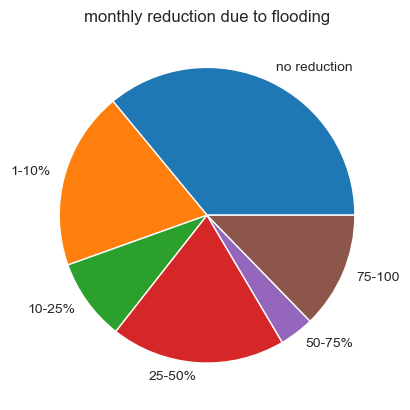

In [164]:
## visualize distribution for most importnat variable = business_reduction 

business_reduction_classes = df_candidates_combined.business_reduction.groupby(pd.cut(
    df_candidates_combined.business_reduction,  [-0.01, 0.01, 10.0, 25.0, 50.0, 75.0, 100.0],)
    #labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"])
    ).count()
business_reduction_classes = pd.DataFrame(business_reduction_classes)

plt.pie(x="business_reduction", labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"], data=business_reduction_classes)
#plt.legend(labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"], loc="best")
plt.title("monthly reduction due to flooding")

In [165]:
#floods_years_s = pd.to_datetime(floods_time_rs["P1Q2.2.2"], errors='ignore', format='mixed')
df["flood_time_r"] = df["flood_time_r"].str.split(pat="/", expand=True)[2]  
df["flood_time_s"] = df["flood_time_s"].str.split(pat="/", expand=True)[2] 
df["flood_time_r"] = pd.to_datetime(df["flood_time_r"]).dt.strftime('%Y')
df["flood_time_s"] = pd.to_datetime(df["flood_time_s"]).dt.strftime('%Y')
df;



In [168]:
# df.Target_direct_r  = df.Target_direct_r.replace(r'^,', '', regex=True)  # fix values beginning with random commas e.g. ,5
# df.Target_direct_r = df.Target_direct_r.astype(str).apply(lambda x: np.where(x.isdigit(), x, np.nan)) # set remaining errorneous values as nan e.g 1,5
# df.Target_direct_r = df.Target_direct_r.astype(float).astype(pd.Int64Dtype())
# df.Target_direct_r

# df.Target_direct_s  = df.Target_direct_s.replace(r'^,', '', regex=True)  # fix values beginning with random commas e.g. ,5
# df.Target_direct_s = df.Target_direct_s.astype(str).apply(lambda x: np.where(x.isdigit(), x, np.nan)) # set remaining errorneous values as nan e.g 1,5
# df.Target_direct_s = df.Target_direct_s.astype(float).astype(pd.Int64Dtype())


,protect_valuables_impl,water_barries_impl,pumping_equipment_impl,elevation_building_impl,resistant_material_building_impl,electricity_higher_impl,flood_protections_impl
0,5.0,3.0,5.0,4.0,5.0,5.0,5.0
1,5.0,5.0,3.0,4.0,5.0,3.0,5.0
2,5.0,5.0,5.0,5.0,5.0,3.0,5.0
3,5.0,5.0,3.0,1.0,5.0,5.0,5.0
4,5.0,5.0,5.0,2.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...
499,2.0,2.0,5.0,1.0,5.0,1.0,5.0
500,1.0,5.0,5.0,1.0,5.0,1.0,5.0
501,1.0,1.0,5.0,1.0,5.0,5.0,5.0
502,1.0,4.0,4.0,5.0,4.0,4.0,5.0


Text(0, 0.5, 'count')

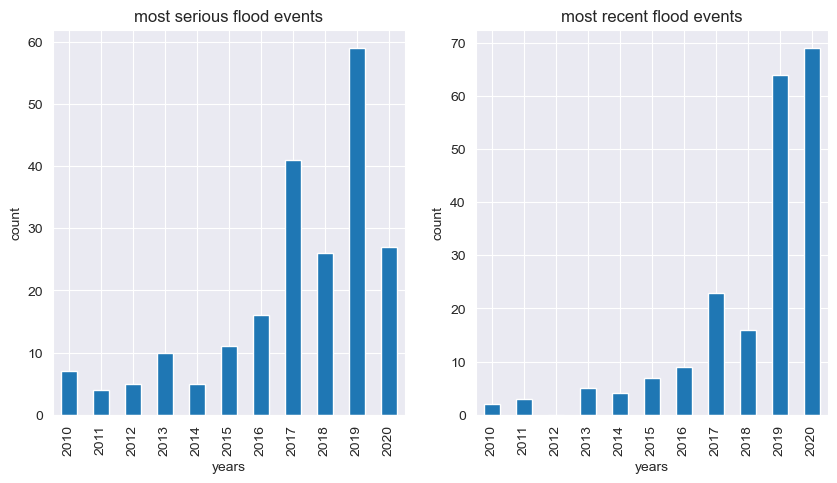

In [367]:
## Timeline: flood events

floods_years_rs = pd.DataFrame({"most_serious": df["flood_time_s"].value_counts(),
       "most_recent": df["flood_time_r"].value_counts()})
floods_years_rs.index.name = "years"


fig, ax = plt.subplots(1,2, figsize=(10,5))

floods_years_rs.most_serious.plot.bar( ax=ax[0], title="most serious flood events")
floods_years_rs.most_recent.plot.bar( ax=ax[1], title="most recent flood events")
ax[0].set_ylabel("count")
ax[1].set_ylabel("count")


In [368]:
sum(rfloods_by_year.loc["2018",:].sum())

6031.3

Text(0, 0.5, 'mVND, max= 6031.3 mVND')

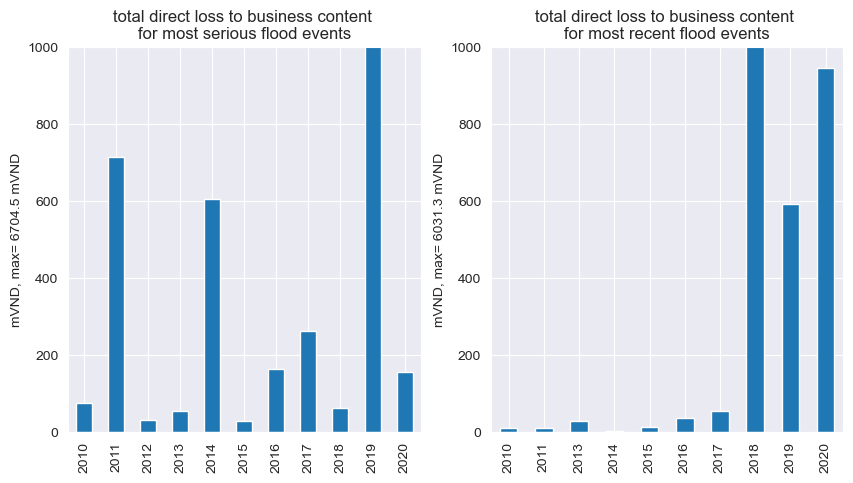

In [369]:
## Timeline: Damage costs caused by floods

## TODO check if cost by year are correct - eg. Leitpold "total costs per secotr" - seems erroneous eg. 2011, 2019 with many flood events

df = df.sort_values('flood_time_r')
rfloods_by_year = df.groupby('flood_time_r')['Target_direct_r']
rfloods_by_year = pd.DataFrame(rfloods_by_year.apply(list).values).set_index(pd.DataFrame(rfloods_by_year)[0])
df = df.sort_values('flood_time_s')
sfloods_by_year = df.groupby('flood_time_s')['Target_direct_s']
sfloods_by_year = pd.DataFrame(sfloods_by_year.apply(list).values).set_index(pd.DataFrame(sfloods_by_year)[0])


fig, ax = plt.subplots(1,2, figsize=(10,5))
sfloods_by_year[0].apply(sum).plot.bar( title="total direct loss to business content \nfor most serious flood events", ax=ax[0]) # .astype("Int64")
rfloods_by_year[0].apply(sum).plot.bar( title="total direct loss to business content \nfor most recent flood events", ax=ax[1])
ax[0].set_ylabel("mVND")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylim([0,1000]) 
ax[0].set_ylabel(f"mVND, max= {sum(sfloods_by_year.loc['2019',:].sum())} mVND")
ax[1].set_ylim([0,1000])  #ax[1].set_yscale('log')
ax[1].set_ylabel(f"mVND, max= {sum(rfloods_by_year.loc['2018',:].sum())} mVND")


Text(0, 0.5, 'count')

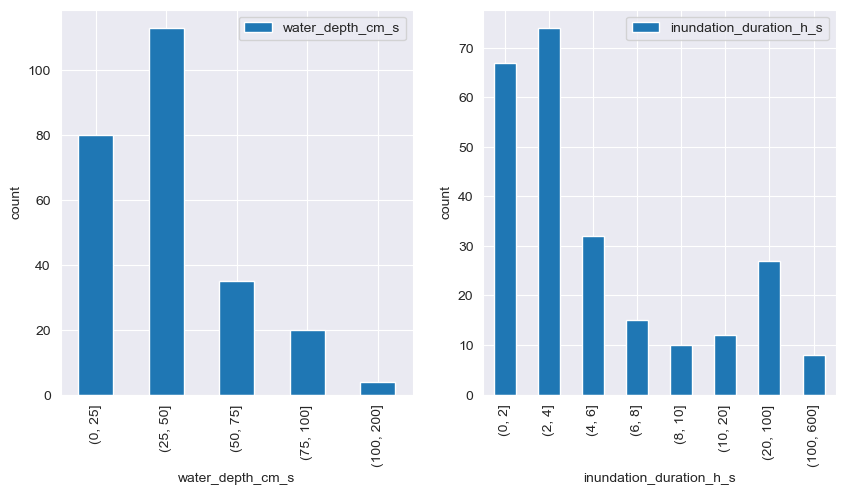

In [370]:
## Timeline: flood variables for most serious flood events

# categorize continious flood variables
inundation_duration_classes = df_candidates.inundation_duration_h_s.groupby(pd.cut(df_candidates.inundation_duration_h_s, [0, 2, 4, 6, 8, 10, 20, 100, 600])).count()
water_depth_classes = df_candidates.water_depth_cm_s.groupby(pd.cut(df_candidates.water_depth_cm_s, [0, 25, 50, 75, 100, 200])).count()
inundation_duration_classes = pd.DataFrame(inundation_duration_classes)
water_depth_classes = pd.DataFrame(water_depth_classes)

fig, ax = plt.subplots(1,2, figsize=(10,5))
water_depth_classes.plot.bar( ax=ax[0])
inundation_duration_classes.plot.bar( ax=ax[1])
ax[0].set_ylabel("count")
ax[1].set_ylabel("count")

#### Summarize water depth and inundation duration

- both flood variables have not a gaussian distribution -> normaization is more suitable when uni- and bivariate stage-damage functions are applied by using the m as independend variables.

#### precaution measures

In [176]:
df_candidates_combined.filter(regex="_impl").value_counts()  # 5=didnt implented , 99=dont know

protect_valuables_impl  water_barries_impl  pumping_equipment_impl  elevation_building_impl  resistant_material_building_impl  electricity_higher_impl  flood_protections_impl
5.0                     5.0                 5.0                     4.0                      5.0                               5.0                      5.0                       32
                        3.0                 5.0                     4.0                      5.0                               5.0                      5.0                       16
3.0                     5.0                 5.0                     3.0                      5.0                               5.0                      5.0                       16
5.0                     5.0                 5.0                     2.0                      5.0                               5.0                      5.0                       14
                                                                    5.0                      5.0     

#### shp_damage_level_products_ + equipemtn + funiture

In [171]:
#df_candidates_combined.shp_damage_level_products.value_counts(
df_candidates_combined.filter(regex="shp_damage_level")

,shp_damage_level_furniture,shp_damage_level_electronics,shp_damage_level_equipment,shp_damage_level_products,shp_damage_level_others,shp_damage_level_others_r.specify,shp_damage_level_others_s.specify
0,1.0,1.0,1.0,1.0,0.0,None,None
1,4.0,4.0,4.0,4.0,0.0,None,None
2,4.0,4.0,4.0,4.0,0.0,None,None
3,1.0,1.0,1.0,1.0,0.0,None,None
4,1.0,1.0,1.0,1.0,0.0,None,None
...,...,...,...,...,...,...,...
499,1.0,1.0,1.0,1.0,0.0,None,None
500,1.0,2.0,3.0,4.0,0.0,None,None
501,1.0,1.0,3.0,1.0,0.0,None,None
502,2.0,2.0,4.0,2.0,0.0,None,None


In [372]:
df_candidates_combined.shp_damage_level_products.value_counts()
#.filter(regex="shp_damage_level")
# ## visualize distribution for most importnat variable = business_reduction 

business_reduction_classes = df_candidates_combined.shp_damage_level_products.groupby(pd.cut(
    df_candidates_combined.shp_damage_level_products, #list(df_candidates_combined.shp_damage_level_products.unique()+0.1))
    [0.0, 1.0, 2.0, 3.0, 4.0, 99.0],)
    #labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"])
    ).count()
business_reduction_classes = pd.DataFrame(business_reduction_classes)

plt.pie(x="shp_damage_level_products", data=business_reduction_classes, labels=list(df_candidates_combined.shp_damage_level_products.unique()))
#plt.legend(labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"], loc="best")
plt.title("damage levels to products")

AttributeError: 'DataFrame' object has no attribute 'shp_damage_level_products'

ValueError: 'label' must be of length 'x'

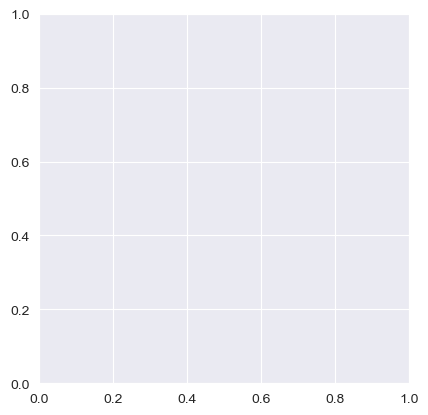

In [328]:
business_reduction_classes = df_candidates_combined.shp_damage_level_equipment.groupby(pd.cut(
    df_candidates_combined.shp_damage_level_equipment, [0.0, 1.0, 2.0, 3.0, 4.0, 5.0],)
    #labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"])
    ).count()
business_reduction_classes = pd.DataFrame(business_reduction_classes)

plt.pie(x="shp_damage_level_equipment", labels=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], data=business_reduction_classes)
#plt.legend(labels=["no reduction", "1-10%", "10-25%", "25-50%", "50-75%", "75-100"], loc="best")
plt.title("damage levels to business buildings")

## Create indicators
indictator for precautionary measure
- as a ratio between b measures implemented prior to the flood (nI) divided by the nb measures potentailly could have implemented (nP)
- (https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020WR027649)
- ! check out paper from Sieg et al. (2017) - they didnt combined adapt+mitig+emerg= have more predictors

Maybe socio-economic status indicator:
- according to Plapp 2003, applied by Thieken et al 2005

indicator of warning information, 
indicator of emergency measures, 
perception of efficiency of private precaution, 
building quality, 
building/content value
